In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("../data/processed/processed_dataset.csv")
data

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,Unknown,462.11
1,AUS,1972,15.091,0.686,36.056,Unknown,475.11
2,AUS,1973,15.117,0.681,39.871,Unknown,533.47
3,AUS,1974,14.771,0.755,47.559,Unknown,652.65
4,AUS,1975,11.849,0.682,47.561,Unknown,660.76
...,...,...,...,...,...,...,...
1031,USA,2011,11.855,1.939,965.580,Unknown,300935.91
1032,USA,2012,11.459,1.874,964.237,Unknown,302768.85
1033,USA,2013,11.384,1.858,980.864,Unknown,310154.01
1034,USA,2014,11.968,1.981,1081.402,Unknown,344495.16


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   1036 non-null   object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB


In [4]:
data['FLAG_CODES'].value_counts().unique()

array([973,  46,  11,   6], dtype=int64)

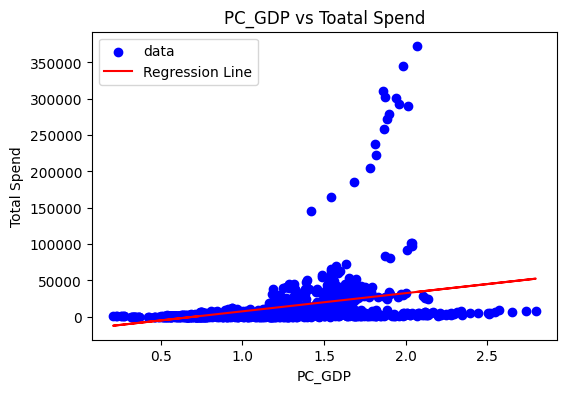

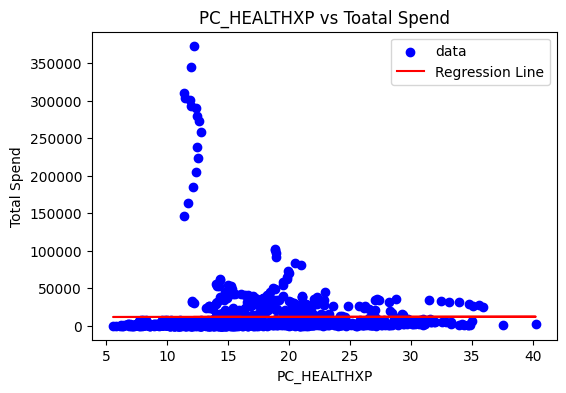

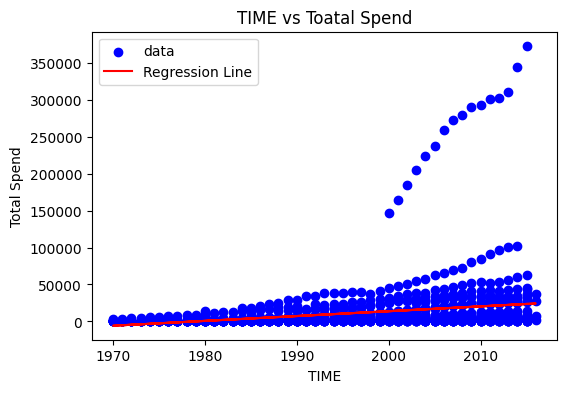

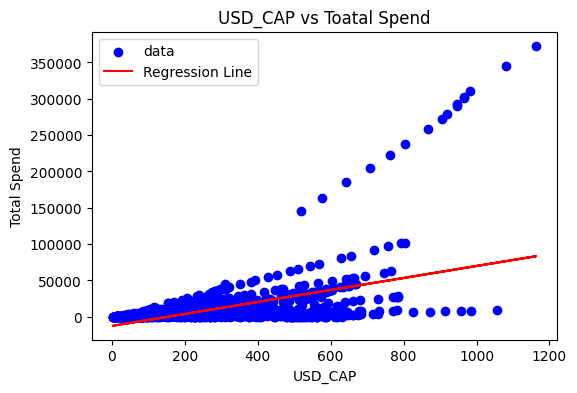

In [5]:
# Exclude the 'TOTAL_SPEND' (target variable) and non-numeric columns from the feature names
feature_names = data.select_dtypes(include=[float, int]).columns.difference(['TOTAL_SPEND','LOCATION'])

# Loop through each numeric feature (column) in data
for feature in feature_names:
    # Extract the feature column and target variable (TOTAL_SPEND)
    X_feature = data[[feature]].values  # Extract as a 2D array
    y = data['TOTAL_SPEND'].values  # Target variable (TOTAL_SPEND)
    
    # Create a scatter plot for the feature against the target (TOTAL_SPEND)
    plt.figure(figsize=(6, 4))
    plt.scatter(X_feature, y, label='data', color='blue')

    # Fit a linear regression model
    lm = LinearRegression()
    lm.fit(X_feature, y)

    # Plot the regression line
    plt.plot(X_feature, lm.predict(X_feature), color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Total Spend')
    plt.title(f'{feature} vs Toatal Spend')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

In [6]:
# Split the dataset into 75% training data and 25% test data with using random_state 42
data_train, data_test = train_test_split(
                                        data, train_size=0.75, random_state=42
                                        )

In [ ]:
# use multiple linear regreesion to check how 'Total spend' variable is dependent on the all other variable. 

mlm = LinearRegression()
mlm.fit(
        data_train[["PC_GDP","PC_HEALTHXP","USD_CAP"]], # Three predictors
        data_train["TOTAL_SPEND"]  #Target variable
)

LinearRegression()

In [ ]:
# Create a DataFrame containing the slope (coefficients) and intercept
numeric_predictors = data_test[["PC_GDP","PC_HEALTHXP","USD_CAP"]]
coefficients_df = pd.DataFrame({
    "predictor": numeric_predictors.columns,
    "slope": mlm.coef_,
    "intercept": [mlm.intercept_] * len(mlm.coef_)
})

# Display the coefficients DataFrame
coefficients_df

,predictor,slope,intercept
0,PC_GDP,24030.515355,-6814.80383
1,PC_HEALTHXP,-1645.069705,-6814.80383
2,USD_CAP,58.928990,-6814.80383


In [9]:
# Predict Total spend using the multivariable linear regression model (mlm) with three predictors.

data_test["predicted"] = mlm.predict(data_test[["PC_GDP","PC_HEALTHXP","USD_CAP"]])
data_test
# Calculate RMSPE for the multivariable model.
lm_mult_test_RMSPE = mean_squared_error(
    y_true=data_test["TOTAL_SPEND"],
    y_pred=data_test["predicted"]
)**(1/2)

lm_mult_test_RMSPE

24612.391578282022